In [86]:
from ophyd.areadetector.plugins import PluginBase, register_plugin
from ophyd.areadetector.base import DDC_EpicsSignal, DDC_EpicsSignalRO
from ophyd.areadetector.base import ADComponent as ADCpt
from ophyd.areadetector.filestore_mixins import FileStoreTIFF


@register_plugin
class CVPlugin(PluginBase):
    _default_suffix = "CV1:"
    _suffix_re = "CV1\d:"
    _default_read_attrs = ["outputs"]
    func_sets = DDC_EpicsSignal(
        *[(f"func_set{k}", f"CompVisionFunction{k}") for k in range(1, 4)]
    )
    inputs = DDC_EpicsSignal(*[(f"input{k}", f"Input{k}") for k in range(1, 11)])
    outputs = DDC_EpicsSignalRO(
        *[(f"output{k}", f"Output{k}_RBV") for k in range(1, 11)]
    )
    cam_depth = ADCpt(EpicsSignal, "CompVisionCamDepth", kind="config")


# XF:17IDB-ES:AMX


class TIFFPluginWithFileStore(TIFFPlugin, FileStoreTIFF):
    pass


class TopProsilica(SingleTrigger, ProsilicaDetector):
    _default_read_attrs = ["cv1", "tiff"]
    roi1 = Cpt(ROIPlugin, "ROI1:")
    roi2 = Cpt(ROIPlugin, "ROI2:")
    roi3 = Cpt(ROIPlugin, "ROI3:")
    roi4 = Cpt(ROIPlugin, "ROI4:")
    cv1 = Cpt(CVPlugin, "CV1:")
    trans1 = Cpt(TransformPlugin, "Trans1:")
    tiff = Cpt(
        TIFFPluginWithFileStore,
        "TIFF1:",
        write_path_template="/nsls2/data/staff/dkreitler/softioc-amx_data",
    )
    proc1 = Cpt(ProcessPlugin, "Proc1:")
    stats1 = Cpt(StatsPlugin, "Stats1:")
    stats2 = Cpt(StatsPlugin, "Stats2:")
    stats3 = Cpt(StatsPlugin, "Stats3:")
    stats4 = Cpt(StatsPlugin, "Stats4:")
    stats5 = Cpt(StatsPlugin, "Stats5:")

    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.tiff.read_attrs = []
        self.cv1.outputs.read_attrs = [f"output{k}" for k in range(1, 11)]

                                                          

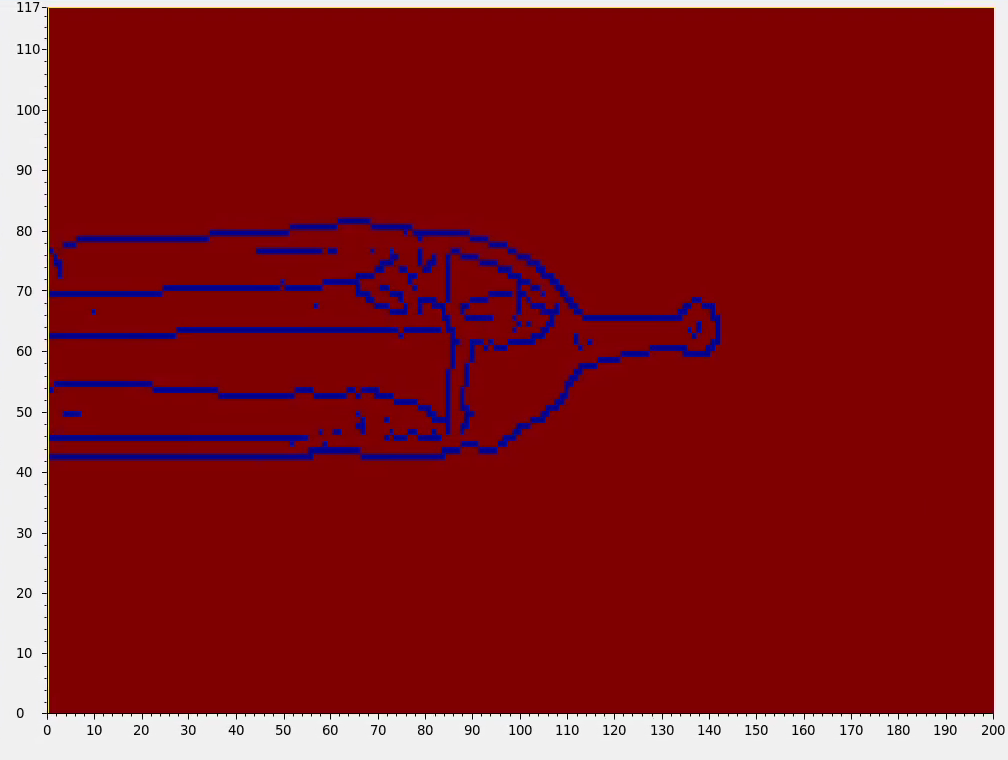

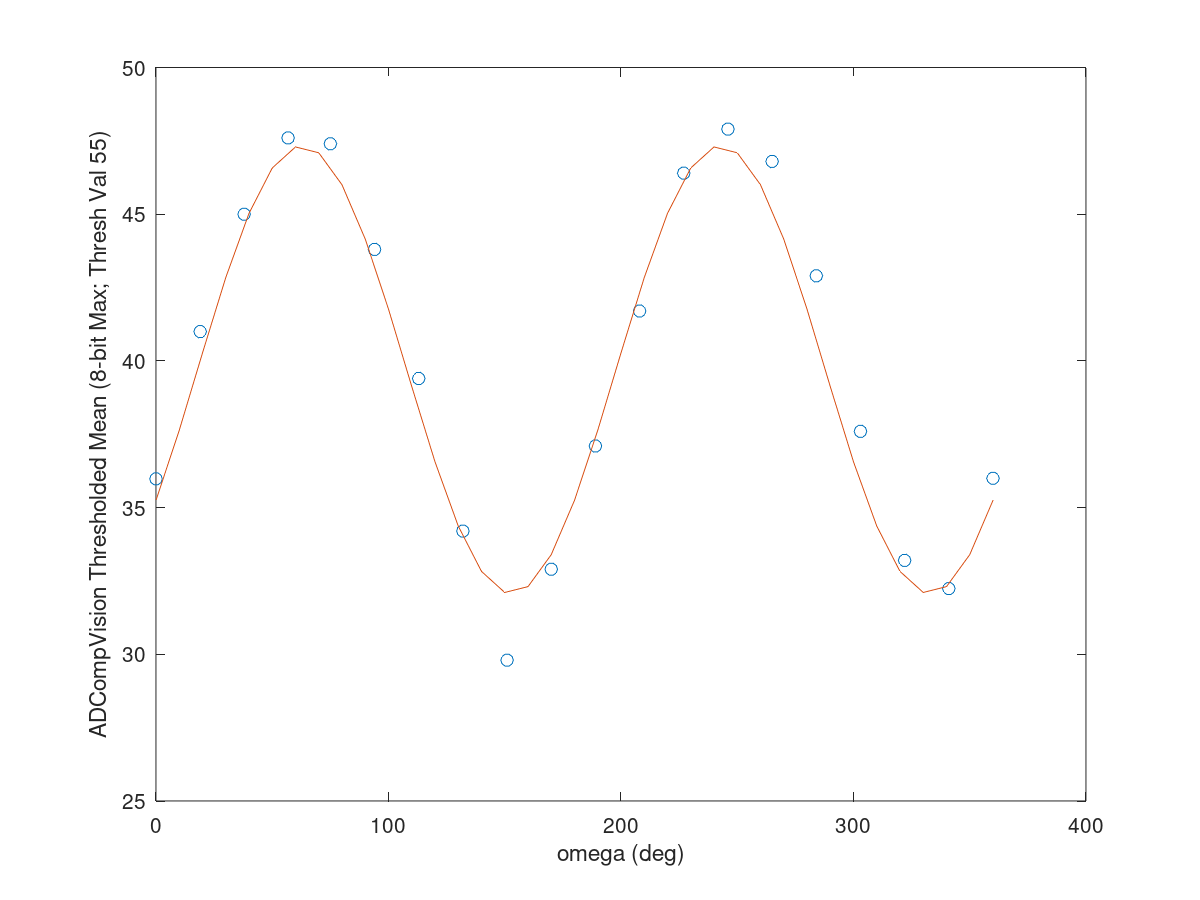

In [88]:
topcam.cv1.cam_depth

EpicsSignal(read_pv='XF:17IDB-ES:AMX{Cam:9}CV1:CompVisionCamDepth', name='topcam_cv1_cam_depth', parent='topcam_cv1', timestamp=1661969022.356215, auto_monitor=False, string=False, write_pv='XF:17IDB-ES:AMX{Cam:9}CV1:CompVisionCamDepth', limits=False, put_complete=False)

In [95]:
RE(bp.scan([topcam],gonio.o,0,10,5))

An exception has occurred, use '%tb verbose' to see the full traceback.


ServerSelectionTimeoutError: xf17id2-srv2.nsls2.bnl.local:27017: [Errno 111] Connection refused, Timeout: 30s, Topology Description: <TopologyDescription id: 6317728cbcfb0b979f3b0607, topology_type: Unknown, servers: [<ServerDescription ('xf17id2-srv2.nsls2.bnl.local', 27017) server_type: Unknown, rtt: None, error=AutoReconnect('xf17id2-srv2.nsls2.bnl.local:27017: [Errno 111] Connection refused')>]>

See /epics/iocs/notebook/.cache/bluesky/log/bluesky.log for the full traceback.


In [102]:
omega_list = [0, 45, 90, 180]
d = np.pi/180
A = np.matrix([[np.cos(2*omega*d), np.sin(2*omega*d), 1] for omega in omega_list])

In [103]:
A

matrix([[ 1.0000000e+00,  0.0000000e+00,  1.0000000e+00],
        [ 6.1232340e-17,  1.0000000e+00,  1.0000000e+00],
        [-1.0000000e+00,  1.2246468e-16,  1.0000000e+00],
        [ 1.0000000e+00, -2.4492936e-16,  1.0000000e+00]])

In [126]:

b = np.matrix([64.4,65.4,65.4,65.2])
p0 = np.linalg.inv(A.transpose()*A)*A.transpose()*b.transpose()

In [127]:
p0

matrix([[-0.3],
        [ 0.3],
        [65.1]])

In [128]:
bigA = np.sqrt(p0[0]**2 + p0[1]**2)
a = np.arcsin(p0[0]/bigA)
b = np.arccos(p0[1]/bigA)

In [129]:
a*180/np.pi

matrix([[-45.]])

In [130]:
b*180/np.pi

matrix([[45.]])